In [1]:
import pandas as pd

In [4]:
from pandas_datareader import wb

In [5]:
population = wb.download(indicator='SP.POP.TOTL', 
                         country=['US', 'RU', 'CA', 'IT', 'AF'],
                         start=1970, end=2010)

In [9]:
population = population.unstack().T

In [12]:
%matplotlib inline

In [16]:
population.index = population.index.droplevel()

In [20]:
import matplotlib.pyplot as plt

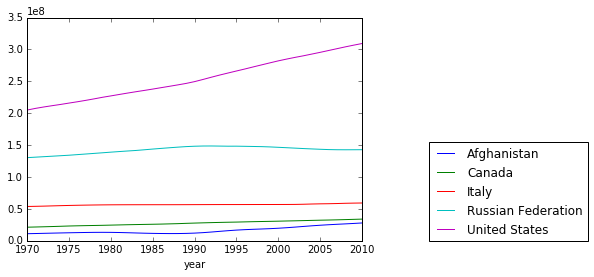

In [26]:
population.plot(legend=False)
plt.legend(loc=(1.2, 0))

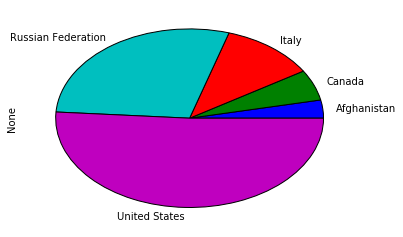

In [19]:
population.mean().plot(kind='pie')

In [28]:
wb.search("cell")

,id,name,source,sourceNote,sourceOrganization,topics
5975,IT.CEL.SETS,Mobile cellular subscriptions,World Development Indicators,Mobile cellular telephone subscriptions are su...,"b'International Telecommunication Union, World...",Infrastructure
5976,IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),World Development Indicators,Mobile cellular telephone subscriptions are su...,"b'International Telecommunication Union, World...",Infrastructure
5978,IT.CELL.3MIN.CD.OP,Mobile cellular - price of 3-minute local call...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5979,IT.CELL.3MIN.CD.PK,Mobile cellular - price of 3-minute local call...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5980,IT.CELL.3MIN.CN.OP,Mobile cellular - price of 3-minute local call...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5981,IT.CELL.3MIN.CN.PK,Mobile cellular - price of 3-minute local call...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5982,IT.CELL.MSUB.CD,Mobile cellular monthly subscription (current ...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5983,IT.CELL.MSUB.CN,Mobile cellular monthly subscription (current ...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5984,IT.CELL.PO.CONN.CD,Mobile cellular postpaid connection charge (cu...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",
5985,IT.CELL.PO.CONN.CN,Mobile cellular postpaid connection charge (cu...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",


In [29]:
cellphones = wb.download(indicator=['IT.CEL.SETS.P2', 'NY.GDP.PCAP.KD'], 
                         country='all',
                         start=2014, end=2014)

In [37]:
cellphones.rename(columns={'IT.CEL.SETS.P2': 'cellphone',
                           'NY.GDP.PCAP.KD': 'gdb'}, inplace=True)

In [38]:
cellphones.corr()

,cellphone,gdb
cellphone,1.000000,0.459035
gdb,0.459035,1.000000


In [32]:
import numpy as np

In [33]:
import statsmodels.formula.api as smf

In [39]:
model = smf.ols("cellphone ~ np.log(gdb)", data=cellphones).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cellphone   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     148.9
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           1.08e-26
Time:                        11:05:24   Log-Likelihood:                -1107.9
No. Observations:                 230   AIC:                             2220.
Df Residuals:                     228   BIC:                             2227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -41.7900     12.191     -3.428      0.001       -65.811   -17.770
np.log(gdb)    17.1554      1.406     12.203      0.000        14.385    19.926
==============================================================================
Omnibus:                       70.925   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.007
Skew:                           1.239   Prob(JB):                     1.15e-55
Kurtosis:                       7.502   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from pandas_datareader import get_data_yahoo

In [44]:
stocks = get_data_yahoo(['AAPL', 'GOOG', 'MSFT', 'IBM'],
                       start="2014-10-01",
                       end="2015-1-1")

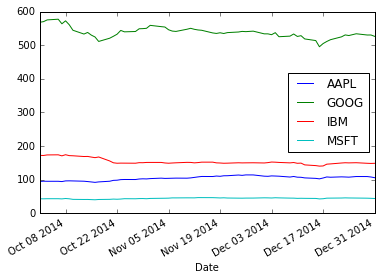

In [47]:
stocks['Adj Close'].plot()

In [49]:
stocks['Adj Close'].pct_change().corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.475715,0.196653,0.495257
GOOG,0.475715,1.000000,0.220500,0.498792
IBM,0.196653,0.220500,1.000000,0.288040
MSFT,0.495257,0.498792,0.288040,1.000000


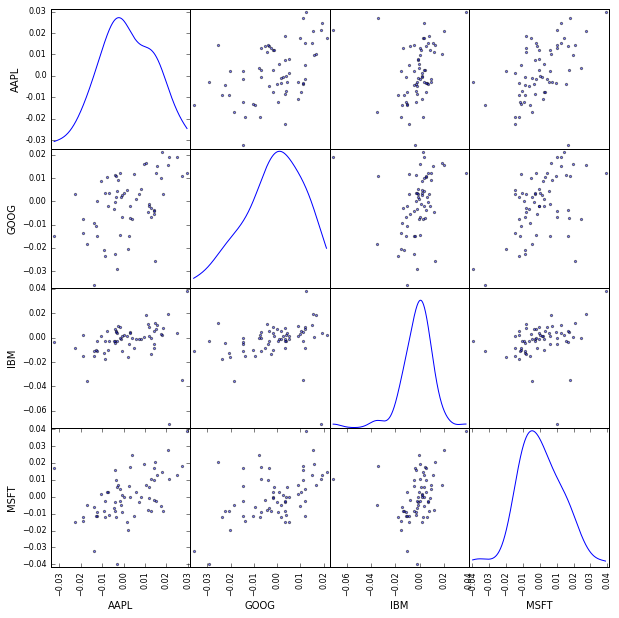

In [54]:
pd.scatter_matrix(stocks['Adj Close'].pct_change(), diagonal='kde', 
                  figsize=(10, 10));

In [55]:
from scipy.integrate import quad

In [56]:
def f(x):
    return x ** 2

In [57]:
quad(f, 0, 1)

(0.33333333333333337, 3.700743415417189e-15)

In [76]:
import sympy

In [63]:
from sympy import init_printing
init_printing(use_latex='mathjax')

In [64]:
x = sympy.Symbol('x')

In [72]:
sympy.solve(x**2 + 5*x+6, x)

[-3, -2]

In [73]:
f = x**2 + 5 * x

In [75]:
f.subs({x: 3*x + 15})

                 2     
15⋅x + (3⋅x + 15)  + 75

In [79]:
print(sympy.pi.evalf(100000))

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [80]:
sympy.sin(sympy.pi)

0

In [81]:
np.sin(np.pi)

1.22464679915e-16

In [83]:
sympy.trigsimp(sympy.sin(1)**2 + sympy.cos(1)**2)

1

In [84]:
M = sympy.Matrix([[x, 1], [1, x]])

In [85]:
M

⎡x  1⎤
⎢    ⎥
⎣1  x⎦

In [86]:
M.eigenvects()

⎡⎛x - 1, 1, ⎡⎡-1⎤⎤⎞, ⎛x + 1, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜          ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢ ⎥⎥⎟⎥
⎣⎝          ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1⎦⎦⎠⎦

In [88]:
(M ** 10).subs({x: 1})

⎡512  512⎤
⎢        ⎥
⎣512  512⎦

In [89]:
from scipy.optimize import minimize

In [95]:
def f(x):
    return x @ x

In [96]:
minimize(f, np.array([1, 2, 2, 1]))

      fun: 2.8871571507563945e-16
 hess_inv: array([[ 0.95, -0.1 , -0.1 , -0.05],
       [-0.1 ,  0.8 , -0.2 , -0.1 ],
       [-0.1 , -0.2 ,  0.8 , -0.1 ],
       [-0.05, -0.1 , -0.1 ,  0.95]])
      jac: array([ -5.96255015e-09,   2.97903978e-09,   2.97903978e-09,
        -5.96255015e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ -1.04318557e-08,  -5.96106071e-09,  -5.96106071e-09,
        -1.04318557e-08])

In [97]:
from ipywidgets import interact, interactive, fixed, FloatSlider

In [98]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

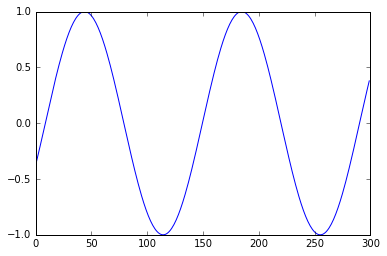

In [99]:
@interact(a=FloatSlider(min=0, max=10, value=1, step=1e-3))
def plot_sin(a):
    x = np.linspace(-4, 4, 300)
    plt.plot(np.sin(a*x))